<a href="https://colab.research.google.com/github/aksl007/ai_source/blob/main/01_titanic_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인사이트

* 성별이 가장 크게 영향을 미칩니다. 여성 > 남성 (남성이 자생할 확률이 높아, 모두 살기위해 여성, 노인, 아이들을 먼저 구한다고 합니다.)
* 여성 중 나이가 많을수록 생존률이 높습니다.
* 승객 등급이 높을수록 생존률이 높습니다.
* 표 요금이 높을수록 근소하게 생존률이 높습니다.
* 승선 위치에 따라 생존률에 영향이 조금 있습니다. C > Q > S

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

titanic = pd.read_csv('/content/titanic.0.txt')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le = LabelEncoder()

titanic['SexLabel'] = le.fit_transform(titanic['Sex'])
titanic['SexLabel'].value_counts()


# titanic['SexLabel'] = pd.factorize(titanic['Sex'])[0].reshape(-1,1)
# titanic['SexLabel'].value_counts()

# titanic['SexNumber'] = np.where(titanic['Sex'] == 'male', 0, 1)
# titanic['EmbarkedNumber'] = np.where(titanic['Embarked'] == 'S', 0, titanic['Embarked'])
# titanic['EmbarkedNumber'] = np.where(titanic['Embarked'] != 'S' and titanic['Embarked'] == 'C', 1, 2)

,count
SexLabel,
1,577
0,314


In [ ]:
titanic['EmbarkedLabel'] = le.fit_transform(titanic['Embarked'])
titanic['EmbarkedLabel'].value_counts()

,count
EmbarkedLabel,
2,644
0,168
1,77
3,2


In [ ]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


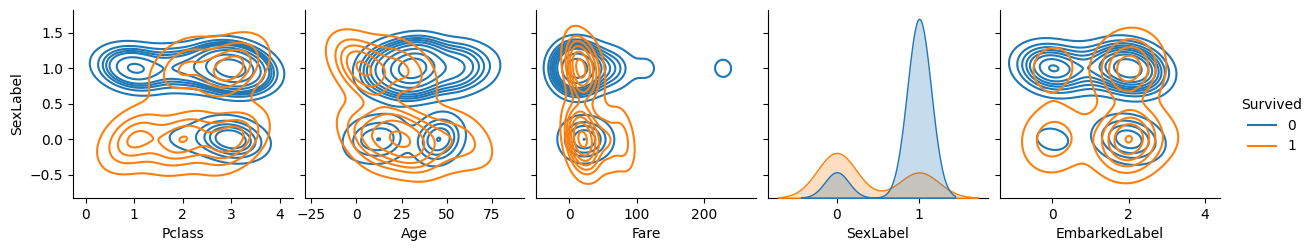

In [ ]:
sns.pairplot(titanic.sample(100),
             x_vars=['Pclass', 'Age', 'Fare', 'SexLabel', 'EmbarkedLabel'],
             y_vars=['SexLabel'],
             hue='Survived',
             kind="kde"
             )
plt.show()

In [ ]:
titanic['AgeLevel'] = pd.cut(titanic['Age'], bins=[0,10,20,30,40,50,60,70,81], labels=[0,1,2,3,4,5,6,7])

temp1 = titanic.groupby(['AgeLevel','SexLabel'], as_index = False)['Survived'].mean()
temp1

<ipython-input-54-b082160a8891>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = titanic.groupby(['AgeLevel','SexLabel'], as_index = False)['Survived'].mean()


,AgeLevel,SexLabel,Survived
0,0,0,0.612903
1,0,1,0.575758
2,1,0,0.739130
3,1,1,0.144928
4,2,0,0.753086
5,2,1,0.154362
6,3,0,0.836364
7,3,1,0.230000
8,4,0,0.677419
9,4,1,0.218182


In [ ]:
temp2 = temp1.pivot(index='AgeLevel', columns='SexLabel', values='Survived')
temp2

SexLabel,0,1
AgeLevel,,
0,0.612903,0.575758
1,0.739130,0.144928
2,0.753086,0.154362
3,0.836364,0.230000
4,0.677419,0.218182
5,0.928571,0.142857
6,1.000000,0.071429
7,NaN,0.200000


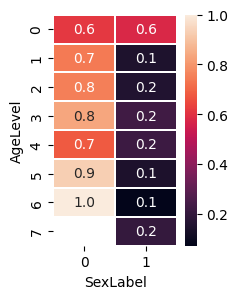

In [ ]:
plt.figure(figsize = (2,3))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

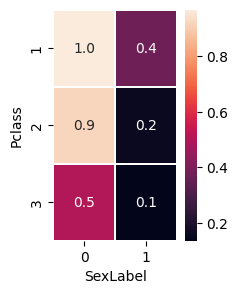

In [ ]:
temp1 = titanic.groupby(['Pclass','SexLabel'], as_index = False)['Survived'].mean()
temp1
temp2 = temp1.pivot(index='Pclass', columns='SexLabel', values='Survived')
temp2
plt.figure(figsize = (2,3))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

In [ ]:
titanic['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<ipython-input-70-23368fc8cdec>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = titanic.groupby(['FareLevel','SexLabel'], as_index = False)['Survived'].mean()


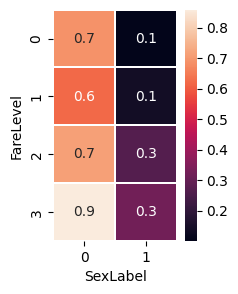

In [ ]:
titanic['FareLevel'] = pd.cut(titanic['Fare'], bins=[0,8,15,30,550], labels=[0,1,2,3])

temp1 = titanic.groupby(['FareLevel','SexLabel'], as_index = False)['Survived'].mean()
temp1
temp2 = temp1.pivot(index='FareLevel', columns='SexLabel', values='Survived')
temp2
plt.figure(figsize = (2,3))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

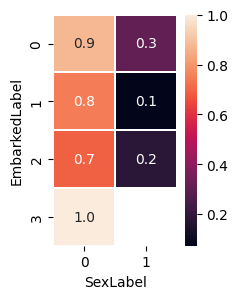

In [ ]:
temp1 = titanic.groupby(['EmbarkedLabel','SexLabel'], as_index = False)['Survived'].mean()
temp1
temp2 = temp1.pivot(index='EmbarkedLabel', columns='SexLabel', values='Survived')
temp2
plt.figure(figsize = (2,3))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

#인사이트

* 성별이 가장 크게 영향을 미칩니다. 여성 > 남성 (남성이 자생할 확률이 높아, 모두 살기위해 여성, 노인, 아이들을 먼저 구한다고 합니다.)
* 여성 중 나이가 많을수록 생존률이 높습니다.
* 승객 등급이 높을수록 생존률이 높습니다.
* 표 요금이 높을수록 근소하게 생존률이 높습니다.
* 승선 위치에 따라 생존률에 영향이 조금 있습니다. C > Q > S